## Encoding with Pandas get_dummies


Anteriormente abordamos el tema de la codificación y su importancia. En resumen, los modelos de aprendizaje automático son modelos matemáticos que utilizan algoritmos que funcionan con tipos de datos numéricos, y las redes neuronales también funcionan con tipos de datos numéricos.
Por lo tanto, necesitamos métodos de codificación para convertir datos no numéricos en datos numéricos significativos. Hemos abordado los métodos de codificación y las opciones que podemos aplicar en este enlace.

En esta historia, veremos el método get_dummies de Pandas. El método get_dummies de Pandas
es la forma más sencilla de implementar un método de codificación activa y tiene parámetros muy útiles, de los cuales mencionaremos los más importantes. Con get_dummies
podemos obtener un marco de datos de codificador activo (variables ficticias) en una fila.

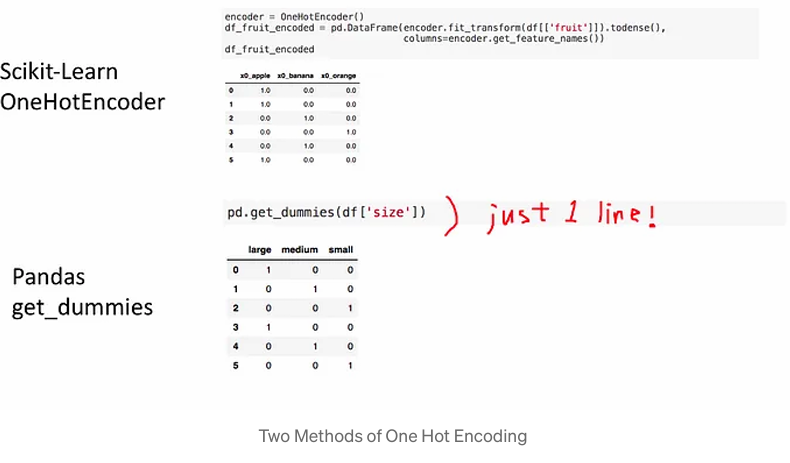

Usaremos estos datos de car_price para esta demostración

El propósito de este proceso de ciencia de datos es predecir los precios de los automóviles. Usaremos la regresión lineal para estos datos, pero los datos no están listos para el modelo de aprendizaje automático.
Porque hay columnas categóricas (no numéricas) y necesitamos transformarlas. Para esto, implementaremos get_dummies.
Antes de sumergirnos en Get_dummies, revisemos los datos

In [101]:
import pandas as pd
import numpy as np

In [102]:
df = pd.read_csv('car_price.csv')
df.head()

,make_model,body_type,Body Color,km,hp,Gearing Type,Extras,price
0,Audi A1,Sedans,Black,56013,85,Automatic,"Alloy wheels,Catalytic Converter,Voice Control",15770
1,Audi A1,Sedans,Red,80000,85,Automatic,"Alloy wheels,Sport seats,Sport suspension,Voic...",14500
2,Audi A1,Sedans,Black,83450,85,Automatic,"Alloy wheels,Voice Control",14640
3,Audi A1,Sedans,Brown,73000,85,Automatic,"Alloy wheels,Sport seats,Voice Control",14500
4,Audi A1,Sedans,Black,16200,85,Automatic,"Alloy wheels,Sport package,Sport suspension,Vo...",16790


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make_model    4800 non-null   object
 1   body_type     4800 non-null   object
 2   Body Color    4800 non-null   object
 3   km            4800 non-null   int64 
 4   hp            4800 non-null   int64 
 5   Gearing Type  4800 non-null   object
 6   Extras        4800 non-null   object
 7   price         4800 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 300.1+ KB


salida del método info() de la biblioteca pandas en Python, aplicado a un DataFrame llamado df. Este método proporciona un resumen conciso del DataFrame, incluyendo información sobre el número de entradas, nombres de columnas, cantidad de valores no nulos y tipos de datos.

Aquí tienes un desglose de la salida:

RangeIndex: Indica que el DataFrame tiene 4800 entradas, numeradas de 0 a 4799.
Columnas: Hay un total de 8 columnas en el DataFrame.
make_model: 4800 valores no nulos, tipo de dato object (cadena de texto).
body_type: 4800 valores no nulos, tipo de dato object.
Body Color: 4800 valores no nulos, tipo de dato object.
km: 4800 valores no nulos, tipo de dato int64 (número entero).
hp: 4800 valores no nulos, tipo de dato int64.
Gearing Type: 4800 valores no nulos, tipo de dato object.
Extras: 4800 valores no nulos, tipo de dato object.
price: 4800 valores no nulos, tipo de dato int64.
Tipos de datos: El DataFrame tiene 3 columnas de tipo int64 y 5 columnas de tipo object.
Uso de memoria: Aproximadamente 300.1 KB.

Como puede ver, los datos no tienen valores faltantes y adquirí esta estructura después de
manejar valores atípicos.

Tenemos 5 columnas categóricas que necesitamos convertir en numéricas antes del algoritmo de aprendizaje automático. Estas columnas son: “make_model”, “body_type”, “Body Color”, “Gear Type” y “Extras”, todas ellas son datos nominales. Por ejemplo, para “Body
Color” no hay jerarquía entre colores. El negro no tiene superioridad sobre el rojo.
Por eso tenemos que usar un codificador activo

Primero, aplicaremos get_dummies a la columna “Color del cuerpo” para ver los detalles de
get_dummies, luego usaremos todos los marcos de datos;

1 — get_dummies()

In [104]:
df['Body Color'].unique()


array(['Black', 'Red', 'Brown', 'White', 'Grey', 'Blue', 'Silver',
       'Beige', 'Violet', 'Yellow', 'Green', 'Bronze', 'Orange'],
      dtype=object)

In [105]:
df['Body Color'].nunique()

13

La columna “Color del cuerpo” tiene 13 valores únicos, lo que significa que obtendremos 13 columnas
después de aplicar get_dummies.
Con esta sintaxis podemos aplicar get_dummies a una columna de un marco de datos;
 
 pd.get_dummies(df['Body Color'])

In [106]:
pd.get_dummies(df['Body Color'])

,Beige,Black,Blue,Bronze,Brown,Green,Grey,Orange,Red,Silver,Violet,White,Yellow
0,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,False,False,False,False,False,False,False,False,False,False,False,True,False
4796,False,False,False,False,False,False,False,False,False,False,False,True,False
4797,False,False,False,False,False,False,False,False,False,True,False,False,False
4798,False,False,False,False,False,False,False,False,False,True,False,False,False


In [107]:
pd.get_dummies(df['Body Color']).astype(int)

,Beige,Black,Blue,Bronze,Brown,Green,Grey,Orange,Red,Silver,Violet,White,Yellow
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,0,0,0,0,0,0,0,0,0,0,1,0
4796,0,0,0,0,0,0,0,0,0,0,0,1,0
4797,0,0,0,0,0,0,0,0,0,1,0,0,0
4798,0,0,0,0,0,0,0,0,0,1,0,0,0


No usamos ningún parámetro, get_dummies tiene parámetros predeterminados. Como puedes ver obtuvimos un marco de datos de 13 columnas después de get_dummies. Hay 4800 filas. Podemos ver el color del coche. Por ejemplo; el primer coche de color negro, el segundo coche de color rojo,
etc.

Nuestro marco de datos original, df, mantiene su forma. Debemos fusionar estos marcos de datos. Ahora podemos asignar variables ficticias de "Body Color" (un codificador caliente) a un nuevo marco de datos para fusionar con el marco de datos principal.

In [108]:
df_colors = pd.get_dummies(df['Body Color'])
df_colors

,Beige,Black,Blue,Bronze,Brown,Green,Grey,Orange,Red,Silver,Violet,White,Yellow
0,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,False,False,False,False,False,False,False,False,False,False,False,True,False
4796,False,False,False,False,False,False,False,False,False,False,False,True,False
4797,False,False,False,False,False,False,False,False,False,True,False,False,False
4798,False,False,False,False,False,False,False,False,False,True,False,False,False


In [109]:
df_colors = pd.get_dummies(df['Body Color']).astype(int)

In [110]:
df.head()

,make_model,body_type,Body Color,km,hp,Gearing Type,Extras,price
0,Audi A1,Sedans,Black,56013,85,Automatic,"Alloy wheels,Catalytic Converter,Voice Control",15770
1,Audi A1,Sedans,Red,80000,85,Automatic,"Alloy wheels,Sport seats,Sport suspension,Voic...",14500
2,Audi A1,Sedans,Black,83450,85,Automatic,"Alloy wheels,Voice Control",14640
3,Audi A1,Sedans,Brown,73000,85,Automatic,"Alloy wheels,Sport seats,Voice Control",14500
4,Audi A1,Sedans,Black,16200,85,Automatic,"Alloy wheels,Sport package,Sport suspension,Vo...",16790


In [111]:
df_colors.head()

,Beige,Black,Blue,Bronze,Brown,Green,Grey,Orange,Red,Silver,Violet,White,Yellow
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0


Ahora los fusionaremos en marcos de datos usando el método join. Pero deberíamos soltar la columna "Body Color", ya no la necesitamos porque no es numérica

In [112]:
df = (df.drop(['Body Color'],axis =1)).join(df_colors)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make_model    4800 non-null   object
 1   body_type     4800 non-null   object
 2   km            4800 non-null   int64 
 3   hp            4800 non-null   int64 
 4   Gearing Type  4800 non-null   object
 5   Extras        4800 non-null   object
 6   price         4800 non-null   int64 
 7   Beige         4800 non-null   int64 
 8   Black         4800 non-null   int64 
 9   Blue          4800 non-null   int64 
 10  Bronze        4800 non-null   int64 
 11  Brown         4800 non-null   int64 
 12  Green         4800 non-null   int64 
 13  Grey          4800 non-null   int64 
 14  Orange        4800 non-null   int64 
 15  Red           4800 non-null   int64 
 16  Silver        4800 non-null   int64 
 17  Violet        4800 non-null   int64 
 18  White         4800 non-null   int64 
 19  Yellow

Con esta sintaxis, eliminamos la columna "Body Color" y agregamos nuestro maniquí Variables. Como puede ver, todos los colores tienen una columna y los tipos de columna son numéricos.

2 — get_dummies con el parámetro 'drop_first'

Una columna transformada en 13 columnas. Podemos usar el parámetro 'drop_first' y disminuir una columna. Podemos tomar 12 columnas. Normalmente, el valor predeterminado de este parámetro es 'False', simplemente lo establecemos en 'True'. Veamos cómo funciona.

In [114]:
df1 = pd.read_csv('car_price1.csv')

In [141]:
df1.head()

,make_model,body_type,Body Color,km,hp,Gearing Type,Extras,price
0,Audi A1,Sedans,Black,56013,85,Automatic,"Alloy wheels,Catalytic Converter,Voice Control",15770
1,Audi A1,Sedans,Red,80000,85,Automatic,"Alloy wheels,Sport seats,Sport suspension,Voic...",14500
2,Audi A1,Sedans,Black,83450,85,Automatic,"Alloy wheels,Voice Control",14640
3,Audi A1,Sedans,Brown,73000,85,Automatic,"Alloy wheels,Sport seats,Voice Control",14500
4,Audi A1,Sedans,Black,16200,85,Automatic,"Alloy wheels,Sport package,Sport suspension,Vo...",16790


In [128]:
pd.get_dummies(df1['Body Color']).astype(int)

,Beige,Black,Blue,Bronze,Brown,Green,Grey,Orange,Red,Silver,Violet,White,Yellow
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,0,0,0,0,0,0,0,0,0,0,1,0
4796,0,0,0,0,0,0,0,0,0,0,0,1,0
4797,0,0,0,0,0,0,0,0,0,1,0,0,0
4798,0,0,0,0,0,0,0,0,0,1,0,0,0


In [116]:
pd.get_dummies(df1['Body Color'],drop_first = True).astype(int)

,Black,Blue,Bronze,Brown,Green,Grey,Orange,Red,Silver,Violet,White,Yellow
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,0,0,0,0,0,0,0,0,0,1,0
4796,0,0,0,0,0,0,0,0,0,0,1,0
4797,0,0,0,0,0,0,0,0,1,0,0,0
4798,0,0,0,0,0,0,0,0,1,0,0,0


Verifique el número de columnas, en lugar de 13 obtuvimos 12 columnas.
Elimina la primera columna del marco de datos get_dummies. La primera columna de la clase
La columna "Color del cuerpo" es beige. Si hay un coche beige, todas las columnas son 0. Cuando todos los
Las columnas son 0, el modelo sabe que es un coche beige. Echa un vistazo al siguiente ejemplo.

In [117]:
pd.get_dummies(df1['Body Color'].loc[[133]]).astype(int)


,Beige
133,1


In [118]:
pd.get_dummies(df1['Body Color'], drop_first = True).loc[[133]].astype(int)

,Black,Blue,Bronze,Brown,Green,Grey,Orange,Red,Silver,Violet,White,Yellow
133,0,0,0,0,0,0,0,0,0,0,0,0


Más columnas significan menos rendimiento y más tiempo de entrenamiento. Imagina que tenemos 20 columnas que no son numéricas. Si usamos 'drop_first', obtenemos 20 columnas menos. Así es util para utilizar el parámetro drop_first para el rendimiento del modelo

3 — get_dummies con el parámetro 'prefix'
 Si el DataFrame tuviera la columna "Color de tapicería", también obtendríamos un negro o una columna marrón para el color del azulejo después de get_dummies excepto "Body Color". Múltiples columnas con el mismo nombre pueden causar problemas. Podemos usar el 'prefijo'
 para evitar esta situación

In [119]:
pd.get_dummies(df1['Body Color'], drop_first = True, prefix = 'BC').astype(int)

,BC_Black,BC_Blue,BC_Bronze,BC_Brown,BC_Green,BC_Grey,BC_Orange,BC_Red,BC_Silver,BC_Violet,BC_White,BC_Yellow
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,0,0,0,0,0,0,0,0,0,1,0
4796,0,0,0,0,0,0,0,0,0,0,1,0
4797,0,0,0,0,0,0,0,0,1,0,0,0
4798,0,0,0,0,0,0,0,0,1,0,0,0


Este parámetro agrega la palabra como un prefijo con un carácter de subrayado. Para el ejemplo arriba, hemos usado el prefijo BC

4— get_dummies con el parámetro 'columns'
 Podemos aplicar get_dummies directamente a una DataFrame en lugar de aplicarlo individualmente. Agregará automáticamente el nombre de la columna como prefijo para cada dummmy variable.

In [133]:
pd.get_dummies(df1, drop_first = True).astype(int)

,km,hp,price,make_model_Audi A2,make_model_Audi A3,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Other,body_type_Sedans,...,"Extras_Sport seats,Sport suspension,Voice Control","Extras_Sport seats,Sport suspension,Voice Control,Winter tyres","Extras_Sport seats,Voice Control",Extras_Sport suspension,"Extras_Sport suspension,Trailer hitch,Voice Control",Extras_Touch screen,"Extras_Touch screen,Voice Control",Extras_Trailer hitch,Extras_Voice Control,Extras_Winter tyres
0,56013,85,15770,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,80000,85,14500,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,83450,85,14640,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,73000,85,14500,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,16200,85,16790,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,54,85,25000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4796,50,85,24980,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4797,6666,85,24980,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4798,10,85,24980,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Pero el marco de datos evolucionó a 349 columnas porque la columna "Extras" tiene muchas valores únicos. Tenemos que considerar esta columna individualmente. En este caso, podemos usar el parámetro columns.

In [142]:
 pd.get_dummies(df1, columns = ['make_model', 'body_type', 'Body Color', 'Gearing Type'], drop_first = True)


,km,hp,Extras,price,make_model_Audi A2,make_model_Audi A3,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Other,...,Body Color_Green,Body Color_Grey,Body Color_Orange,Body Color_Red,Body Color_Silver,Body Color_Violet,Body Color_White,Body Color_Yellow,Gearing Type_Manual,Gearing Type_Semi-automatic
0,56013,85,"Alloy wheels,Catalytic Converter,Voice Control",15770,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,80000,85,"Alloy wheels,Sport seats,Sport suspension,Voic...",14500,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,83450,85,"Alloy wheels,Voice Control",14640,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,73000,85,"Alloy wheels,Sport seats,Voice Control",14500,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,16200,85,"Alloy wheels,Sport package,Sport suspension,Vo...",16790,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,54,85,"Alloy wheels,Sport seats,Sport suspension,Voic...",25000,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4796,50,85,Alloy wheels,24980,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4797,6666,85,"Alloy wheels,Roof rack",24980,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4798,10,85,"Alloy wheels,Roof rack",24980,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


Con el parámetro columns, podemos aplicar las columnas que queramos. Para que podamos manejar columnas personalizadas más adelante con str.get_dummies

4 — str.get_dummies
El método str.get_dummies es una versión de get_dummies que se puede aplicar a una serie. Es una versión que maneja cadenas. El método str.get_dummies() divide cada cadena en la serie dada con el separador. Solo hay un parámetro separador.
En esta DataFrame, hay algunas características para los autos en la columna “Extras”. Por ejemplo; llantas de aleación, asientos deportivos, control de voz, etc. Estas características son importantes en términos de precio. Verifique a continuación, dice que hay 325 valores únicos. Sin embargo, hay 16 características adicionales. Los autos tienen una cantidad diferente de características adicionales

In [143]:
df1['Extras'].unique()

array(['Alloy wheels,Catalytic Converter,Voice Control',
       'Alloy wheels,Sport seats,Sport suspension,Voice Control',
       'Alloy wheels,Voice Control',
       'Alloy wheels,Sport seats,Voice Control',
       'Alloy wheels,Sport package,Sport suspension,Voice Control',
       'Alloy wheels,Sport package,Sport seats,Sport suspension',
       'Alloy wheels', 'Alloy wheels,Shift paddles',
       'Alloy wheels,Catalytic Converter,Sport package,Sport seats,Sport suspension,Voice Control',
       'Alloy wheels,Sport seats,Sport suspension',
       'Alloy wheels,Sport package,Sport seats',
       'Alloy wheels,Sport package',
       'Alloy wheels,Catalytic Converter,Shift paddles,Voice Control',
       'Alloy wheels,Shift paddles,Sport package,Voice Control',
       'Alloy wheels,Catalytic Converter,Sport seats,Voice Control,Winter tyres',
       'Alloy wheels,Winter tyres', 'Alloy wheels,Catalytic Converter',
       'Catalytic Converter', 'Alloy wheels,Sport suspension',
       'Catal

In [144]:
df1['Extras'].nunique()

325

Si aplicamos get_dummies directamente, se agregan 325 columnas más. Por lo tanto, debemos usar str.get_dummies. Usamos una coma (,) como separador porque los valores en los datos están separados por comas (,)

In [145]:
df1['Extras'].str.get_dummies(',')

,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
4796,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4797,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4798,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Como puede ver, hay 16 funciones adicionales. Busque la primera fila. Tiene llantas de aleación, convertidor catalítico y control de sonido; estos son 1, los demás son 0.
Ahora obtengamos la última versión del marco de datos fusionándolos;

In [147]:
df1 = pd.get_dummies(df1, columns = ['make_model', 'body_type', 'Body Color', 'Gearing Type'], drop_first = True)

In [148]:
df1_extra = df1['Extras'].str.get_dummies(',')

In [150]:
df1_dummy = (df1.drop(['Extras'],axis=1)).join(df1_extra) 

In [151]:
df1_dummy.shape

(4800, 41)

In [152]:
df1_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   km                           4800 non-null   int64
 1   hp                           4800 non-null   int64
 2   price                        4800 non-null   int64
 3   make_model_Audi A2           4800 non-null   bool 
 4   make_model_Audi A3           4800 non-null   bool 
 5   body_type_Convertible        4800 non-null   bool 
 6   body_type_Coupe              4800 non-null   bool 
 7   body_type_Off-Road           4800 non-null   bool 
 8   body_type_Other              4800 non-null   bool 
 9   body_type_Sedans             4800 non-null   bool 
 10  body_type_Station wagon      4800 non-null   bool 
 11  Body Color_Black             4800 non-null   bool 
 12  Body Color_Blue              4800 non-null   bool 
 13  Body Color_Bronze            4800 non-null   boo

In [153]:
# Convertir solo las columnas booleanas a enteros
boolean_columns = df1_dummy.select_dtypes(include='bool').columns
df1_dummy[boolean_columns] = df1_dummy[boolean_columns].astype(int)


In [154]:
df1_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   km                           4800 non-null   int64
 1   hp                           4800 non-null   int64
 2   price                        4800 non-null   int64
 3   make_model_Audi A2           4800 non-null   int64
 4   make_model_Audi A3           4800 non-null   int64
 5   body_type_Convertible        4800 non-null   int64
 6   body_type_Coupe              4800 non-null   int64
 7   body_type_Off-Road           4800 non-null   int64
 8   body_type_Other              4800 non-null   int64
 9   body_type_Sedans             4800 non-null   int64
 10  body_type_Station wagon      4800 non-null   int64
 11  Body Color_Black             4800 non-null   int64
 12  Body Color_Blue              4800 non-null   int64
 13  Body Color_Bronze            4800 non-null   int

Todas las columnas son numéricas. Nuestros datos ya están listos para el modelo.
Conclusión
Pandas get_dummies es el toque final a los datos antes de modelar. Porque tenemos que hacer que todas las columnas no numéricas sean numéricas. Tenemos que usarlo o algún otro método para obtener las tablas de codificación/variables ficticias. Pero como puedes ver, get_dummies es la forma más fácil y tiene muchos parámetros que hacen que nuestro modelo sea más legible y fluido

Importa los datos, trátalos con valores faltantes y atípicos y luego aplica get_dummies.
Está listo para el modelo.

3. Investigar las diferencias entre get_dummies y one hot encoding, añade tu resumen al mismo notebook del artículo anterior

## get_dummies (Pandas)
- Función: get_dummies es una función de Pandas que convierte directamente las columnas categóricas de un DataFrame en columnas binarias.
- Uso: Es útil para análisis exploratorio de datos y transformaciones rápidas.
- Manejo de datos desconocidos: No maneja categorías desconocidas en los datos de prueba, lo que puede causar problemas si aparecen nuevas  categorías que no estaban en los datos de entrenamiento1.
- Salida: Devuelve un DataFrame de Pandas.

## OneHotEncoder (Scikit-learn)
- Clase: OneHotEncoder es una clase en Scikit-learn que requiere convertir los datos en arrays de NumPy antes de la codificación.
- Uso: Es más adecuado para pipelines de machine learning y producción, ya que puede manejar categorías desconocidas con el parámetro handle_unknown2.
- Manejo de datos desconocidos: Puede ignorar categorías desconocidas o generar errores, dependiendo de la configuración.
- Salida: Devuelve una matriz dispersa o un array de NumPy, lo que puede ser más eficiente en términos de memoria

## Ejemplo

In [15]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Datos de ejemplo
data = {'party_cd': ['rep', 'dem', 'ind', 'lib']}
df = pd.DataFrame(data)

# Usando get_dummies
df_dummies = pd.get_dummies(df, columns=['party_cd'], drop_first=True).astype(int)

# Usando OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Cambiado a sparse_output
encoded = encoder.fit_transform(df[['party_cd']])
df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['party_cd']))

# Mostrar resultados
print("Con get_dummies:")
print(df_dummies)
print("\nCon OneHotEncoder:")
print(df_encoded)

Con get_dummies:
   party_cd_ind  party_cd_lib  party_cd_rep
0             0             0             1
1             0             0             0
2             1             0             0
3             0             1             0

Con OneHotEncoder:
   party_cd_ind  party_cd_lib  party_cd_rep
0           0.0           0.0           1.0
1           0.0           0.0           0.0
2           1.0           0.0           0.0
3           0.0           1.0           0.0
